In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 
from nltk.tokenize import sent_tokenize,word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re 
from cleantext import clean
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('blogs.csv')
data1.head()

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

In [3]:
import spacy
from spacy import displacy

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
#pd.set_option('display.max_colwidth',None)

In [7]:
data1

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [8]:
txt = ' '.join(data1['Data'])

In [9]:
txt

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [14]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [15]:
# performing text cleaning (removing punctuation marks, emojis, symbols, tokenization)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = word_tokenize(text)  # Tokenization
    filtered_tokens = [lemma.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [16]:
data1['cleaned_data'] = data1['Data'].apply(preprocess_text)

In [17]:
data1

Data              Labels  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

                                           cleaned_data  
0     path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1     newsgroups altatheism path cantaloupesrvcscmue...  
2     path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3     path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4     xref cantaloupesrvcscmuedu altatheism talkreli...  
...                                                 ...  
1995  xref cantaloupesrvcscmuedu talkabortion altath...  
1996  xref cantaloupesrvcscmuedu talkreligionmisc ta...  
1997  xref cantaloupesrvcscmuedu talkorigins talkrel...  
1998  xref cantaloupesrvcscmuedu talkreligionmisc al...  
1999  xref cantaloupesrvcscmuedu sciskeptic talkpoli...  

[2000 rows x 3 columns]

In [18]:
from sklearn.model_selection import train_test_split
x = data1['cleaned_data']
y = data1['Labels']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# feature Extraction using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
tf = TfidfVectorizer()

In [21]:
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB 
nb_classifier = MultinomialNB()

In [23]:
nb_classifier.fit(x_train,y_train)

MultinomialNB()

In [24]:
y_pred = nb_classifier.predict(x_test)

In [28]:
from sklearn.metrics import classification_report 
print("Training Accuaracy :",nb_classifier.score(x_train,y_train))
print("Testing Accuaracy :",nb_classifier.score(x_test,y_test))
print(classification_report(y_test,y_pred))

Training Accuaracy : 0.99375
Testing Accuaracy : 0.84
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.87      0.91      0.89        22
comp.sys.ibm.pc.hardware       0.88      0.84      0.86        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.76      0.86        25
            misc.forsale       1.00      0.61      0.76        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.76      0.81      0.79        16
                 sci.

#### Sentiment Analysis

In [34]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [36]:
data1['sentiment'] = data1['cleaned_data'].apply(get_sentiment)
print(data1[['Data', 'sentiment']].head())

                                                Data sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive


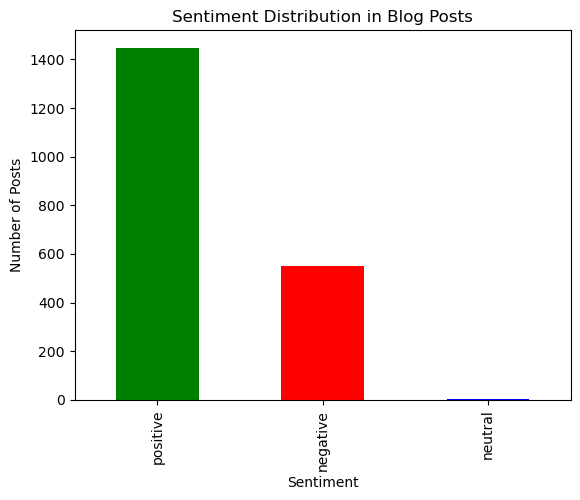

In [42]:
# Visualizing the distribution of sentiments
data1['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

In [49]:
# from bar chart
# 1. Majority of blog posts express positive sentiment 
# 2. Around 500 posts exibit negative sentiment 
# 3. Very few posts fall into Neutral sentiment'''

In [43]:
sentiment_distribution = data1.groupby('Labels')['sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.36      NaN      0.64
comp.graphics                 0.28      NaN      0.72
comp.os.ms-windows.misc       0.22      NaN      0.78
comp.sys.ibm.pc.hardware      0.17      NaN      0.83
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.20      NaN      0.80
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.38      NaN      0.62
rec.sport.hockey              0.44      NaN      0.56
sci.crypt                     0.22      NaN      0.78
sci.electronics               0.24      NaN      0.76
sci.med                       0.34      NaN      0.66
sci.space                     0.29      NaN      0.71
soc.religion.christian        0.24      NaN      0.76
talk.politics.guns          

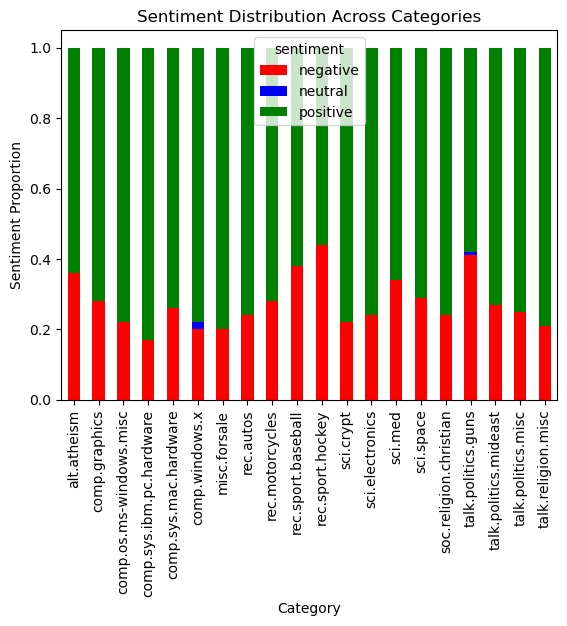

In [47]:
sentiment_distribution.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Sentiment Proportion')
plt.show()

In [51]:
#1. Positive sentiment is generally high across all categories, indicating that most blog posts reflect a positive tone.
#2. Negative sentiment is more common in categories involving debates, religion, and politics.
#3. Neutral sentiment is rare but slightly more present in technical categories.

#### Evaluation

In [58]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average='weighted')
cm = confusion_matrix(y_test,y_pred)

print(f"Accuracy  : {accuracy :.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1        : {f1:.4f}")
print("Confusion Matrix :\n",cm)

Accuracy  : 0.8400
Precision : 0.8588
Recall    : 0.8400
F1        : 0.8283
Confusion Matrix :
 [[17  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0 20  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 21  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  1 19  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  2  2  0  0 19  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0 11  2  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  1  0  0 13  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0